An Analysis of the titanic:
    Due to titanic incident on june 22th, made me interested in the story of titanic in 1912.

Datasets: https://hbiostat.org/data/

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('titanic.csv')


Stop here! Before start graphing, take a look at the data viewer to make sure the data can be graphed.

In [3]:
data.replace('?', np.nan, inplace = True)# Replacing the unknown value. 
data = data.astype({"age":np.float64, "fare":np.float64})

Graph the relationship.

<Axes: xlabel='pclass', ylabel='survived'>

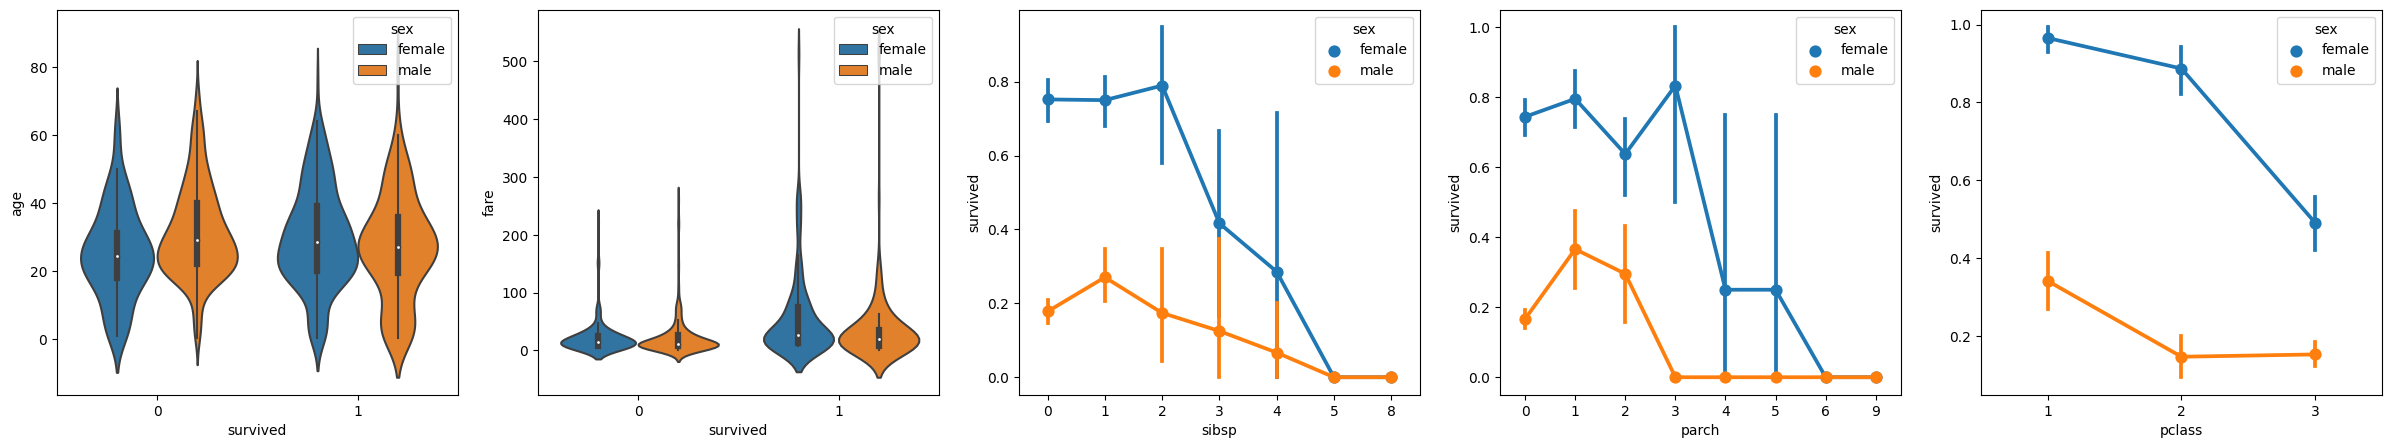

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))

sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])      # survived-age, sex
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[1])     # survived-fare, sex
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[2])     # sibsp(siblings/spouses aboard)-suvived, sex
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[3])     # pach(parent/children aboard)-survived, sex 
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[4])    # pclass(ticket class)-survived, sex

Calculate the correlation of each item to survived.

In [5]:

data.replace({'male': 1, 'female': 0}, inplace= True) # replace strings: 'male' and 'female' into float: 1 and 0.
exclude_columns = ['name','ticket','cabin','embarked','boat','body','home.dest'] # select the columns that cannot be convert to float.
correlation_data = data.drop(exclude_columns, axis=1) # use "drop()" to exclude the selected columns. # axis = 0 : rows ; axis = 1 : columns.
correlation_data.corr().abs()[["survived"]] # "corr()": calculate the correlations. ＃ "abs()" : absolute value. 


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265


In [6]:
correlation_data['relatives'] = correlation_data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
correlation_data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [7]:
data = correlation_data
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna() 
# With this information in hand, drop the dataset the low value 'sibsp' and 'parch' columns, -->
# as well as any rows hat had 'NaN' values, to end up with a dataset that can be used for training a model.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.3, random_state=0)
print(x_train.shape)        # According to the 'test_size = 0.2', x_train = 0.8 * N
print(x_test.shape)         # According to the 'test_size = 0.2', x_test = 0.2 * N 
print(y_train.shape)        # According to the 'test_size = 0.2', y_train = 0.8 * N
print(y_test.shape)         # According to the 'test_size = 0.2', y_test= 0.2 * N


(731, 5)
(314, 5)
(731,)
(314,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                    # In order to normalize the data. mean = 0 , standard deviation = 1.
X_train = sc.fit_transform(x_train)      # Using 'fit_transform' to standardize the x_train.
X_test = sc.transform(x_test)            # 'transform' will follow the details of standardizing 'x_train' to standardize x_test.

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)         # Using 'fit' can input the training data to the model(Gaussian Naive Bayes)

GaussianNB()

Built without neural network(NN)

In [11]:
from sklearn import metrics
predict_test = model.predict(X_test)                  # Input test data -> x_test
print(metrics.accuracy_score(y_test, predict_test))   # Output y_test = the value of predict_test (prediction)

0.7611464968152867


In [12]:
from keras.models import Sequential        
from keras.layers import Dense

model = Sequential()        # Using 'Sequential neural network, which is layered NN wherein there are multi-layer that feed into each other in sequence

2023-07-06 05:34:12.532442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5)) # Layer 1 Five dimension: 'sex', 'pclass', 'age', 'relative', 'fare'
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))                # Layer 2 kept for five simplicity. 
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))             # Layer 3 The last layer must output 1. I want 1-dimensional output indicating whether a passenger would survive. 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])       # Define what type of 'optimizer' and 'loss' will be used and calculated.
history = model.fit(X_train, y_train, batch_size=32, epochs=50)                                   # The entire data was divided into 256 batches. Learned 256 batches = 1 epoch, repeat it 7 times.

Epoch 1/50
23/23 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5923
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5951
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5951
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5951
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5951
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6594 - accuracy: 0.5951
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6435 - accuracy: 0.5951
Epoch 8/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.5951
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.5951
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.5951
Epoch 11/50
23/23 [

In [15]:
y_pred = np.rint(model.predict(X_test).flatten())       # 'rint' = rounding.   'flatten' = flatten into a one-dimensional array
print(metrics.accuracy_score(y_test, y_pred))           # given y_test to show the prediction of survival

10/10 [==============================] - 0s 1ms/step
0.802547770700637


<Axes: >

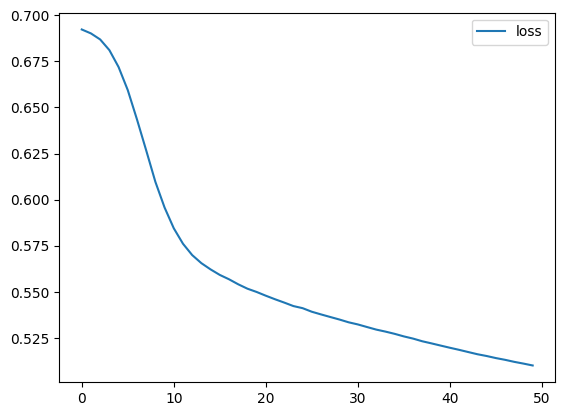

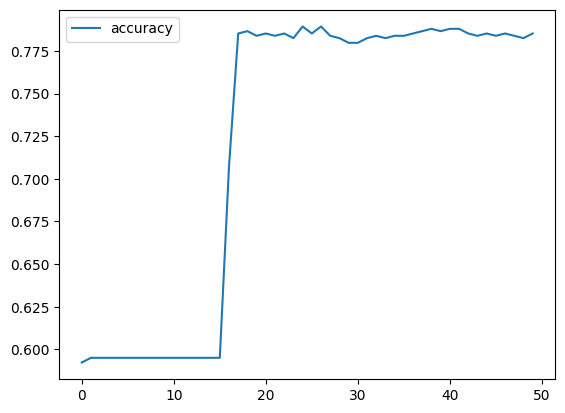

In [16]:
his = pd.DataFrame(history.history)
his.loc[:,['loss']].plot()
his.loc[:,['accuracy']].plot()

Without neural network: 0.746
Neural network: 0.802